In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.combine import SMOTEENN

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [2]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

In [3]:
custom_palette = ['#33A4FF', '#FFB733', '#9FF767']
sns.set_palette(custom_palette)

In [4]:
df = pd.read_csv("sample_for_enn_bsmote.csv")
df

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,0.000000,2.000000,1.500000,0.900000,74.000000,200.000000,95.000000,95.000000,49.000000,14.900000,1.000000,0.500000,19.000000,13.000000,38.000000,3.000000,1.000000,20.811655,0.0
1,1.000000,0.000000,1.200000,1.200000,99.000000,192.000000,65.000000,120.000000,32.000000,15.600000,1.000000,1.100000,37.000000,35.000000,31.000000,1.000000,1.000000,26.234568,0.0
2,1.000000,2.000000,0.100000,0.300000,75.000000,157.000000,62.000000,84.000000,52.000000,15.000000,1.000000,1.000000,31.000000,57.000000,32.000000,3.000000,1.000000,23.148148,0.0
3,0.000000,3.000000,1.200000,1.500000,61.000000,145.000000,62.000000,67.000000,76.000000,12.300000,1.000000,0.500000,15.000000,11.000000,21.000000,1.000000,1.000000,20.202020,0.0
4,1.000000,3.000000,1.500000,1.500000,64.000000,207.000000,42.000000,127.000000,191.000000,16.900000,1.000000,1.100000,33.000000,59.000000,22.000000,3.000000,0.000000,26.122449,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192388,1.000000,1.704616,0.900000,0.876154,87.113847,229.658459,54.943077,135.772306,194.715383,16.487539,1.000000,0.864769,40.989233,102.704616,55.249228,1.704616,1.000000,31.311543,2.0
192389,0.071938,2.928062,0.735969,0.850356,70.431627,177.719378,66.726507,92.920933,88.359689,12.216526,1.071938,0.907194,10.791316,11.071938,54.784187,1.071938,1.000000,19.569411,2.0
192390,1.000000,3.000000,1.197635,1.197635,89.964527,189.023649,43.106419,120.881756,124.165541,16.271622,1.000000,0.898818,21.011824,26.940878,53.082770,1.023649,0.011824,31.082517,2.0
192391,0.000000,2.718566,1.274853,1.274853,75.281434,146.820237,34.065816,42.317290,349.592829,10.740128,1.000000,0.771857,10.532908,7.814342,22.940079,1.000000,0.281434,27.655634,2.0


In [5]:
df.diabete.value_counts()

0.0    64131
1.0    64131
2.0    64131
Name: diabete, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [30]:
from sklearn.preprocessing import StandardScaler

In [73]:
df_sample = df.sample(n=50000)

X_train, X_test, y_train, y_test = train_test_split(df_sample.drop(["diabete"], axis = 1), 
                                                    df_sample["diabete"], 
                                                    test_size=0.2, random_state=42)

st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train = st_scaler.transform(X_train)
X_test = st_scaler.transform(X_test)

In [ ]:
df_sample = df.sample(n=50000)

X_train, X_test, y_train, y_test = train_test_split(df_sample.drop(["diabete"], axis = 1), 
                                                    df_sample["diabete"], 
                                                    test_size=0.2, random_state=42)

st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train = st_scaler.transform(X_train)
X_test = st_scaler.transform(X_test)

result_train = []
result_test = []

for i in range(1,11,1):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    
    y_train_pred = knn_classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    result_train.append(accuracy_train)
    
    
    y_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    result_test.append(accuracy_test)

In [75]:
df_C = pd.DataFrame()
df_C['result_train'] = result_train
df_C['result_test'] = result_test
df_C['neighbor'] = list(range(1,11,1))


df_C = df_C.melt(id_vars = "neighbor", value_vars = ['result_train', 'result_test'])
df_C

,neighbor,variable,value
0,1,result_train,1.000000
1,2,result_train,0.992950
2,3,result_train,0.968575
3,4,result_train,0.964975
4,5,result_train,0.953850
5,6,result_train,0.951400
6,7,result_train,0.943550
7,8,result_train,0.939850
8,9,result_train,0.935125
9,10,result_train,0.931375


<AxesSubplot:xlabel='neighbor', ylabel='value'>

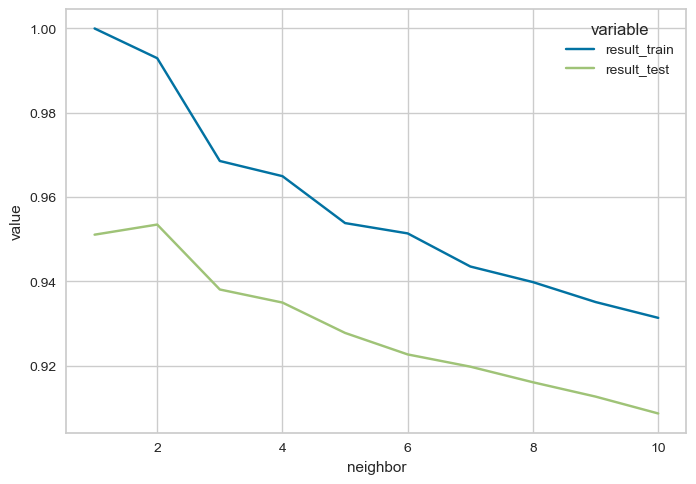

In [76]:
sns.lineplot(data = df_C , y = "value", x = "neighbor", hue = "variable")

In [87]:
df_sample = df.drop(['sight_left', 'sight_right', "LDL_chole"], axis = 1).sample(n=50000)

X_train, X_test, y_train, y_test = train_test_split(df_sample.drop(["diabete"], axis = 1), 
                                                    df_sample["diabete"], 
                                                    test_size=0.2, random_state=42)

st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train = st_scaler.transform(X_train)
X_test = st_scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
recal_trainl = recall_score(y_train, y_train_pred, average = 'macro')
f1_train = f1_score(y_train, y_train_pred, average = 'macro')
precision_train = precision_score(y_train, y_train_pred, average = 'macro')

y_pred = knn_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred, average = 'macro')
f1_test = f1_score(y_test, y_pred, average = 'macro')
precision_test = precision_score(y_test, y_pred, average = 'macro')

print('Train')
print(f'Accuracy: {accuracy_train:.4f}')
print(f'Recall: {recal_trainl:.4f}')
print(f'F1 Score: {f1_train:.4f}')
print(f'Precision: {precision_train:.4f}')
print()
print('Test')
print(f'Accuracy: {accuracy_test:.4f}')
print(f'Recall: {recall_test:.4f}')
print(f'F1 Score: {f1_test:.4f}')
print(f'Precision: {precision_test:.4f}')

Train
Accuracy: 0.9555
Recall: 0.9555
F1 Score: 0.9552
Precision: 0.9566

Test
Accuracy: 0.9396
Recall: 0.9393
F1 Score: 0.9390
Precision: 0.9412


In [100]:
df_sample

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,hemoglobin
38853,0.0,1.000000,1.000000,1.000000,62.000000,175.000000,69.000000,96.000000,12.900000
45096,1.0,1.000000,1.000000,0.700000,76.000000,139.000000,43.000000,76.000000,14.200000
190377,1.0,1.791427,0.841715,0.446001,83.337174,223.128601,35.042867,137.502881,16.603711
140643,1.0,2.417059,1.033176,1.033176,68.161172,199.582941,47.668237,119.497645,15.266824
52923,1.0,3.000000,1.000000,0.500000,69.000000,211.000000,52.000000,132.000000,14.600000
...,...,...,...,...,...,...,...,...,...
135535,1.0,3.000000,1.008249,0.808249,80.865904,230.608292,41.329950,157.639171,16.424746
52331,0.0,3.000000,1.200000,1.500000,88.000000,212.000000,80.000000,113.000000,12.600000
96542,1.0,1.271852,0.608741,0.608741,80.990368,186.271852,43.446665,75.000000,15.618445
183758,1.0,2.105304,1.178939,0.810530,70.210609,289.472695,38.210609,181.472695,15.373713


In [103]:
model = LassoCV(cv=10)
model.fit(df.drop(["diabete"], axis = 1), df["diabete"])

# 변수 중요도 계산
coef = model.coef_

# 변수 선택
selected_features = []
for i in range(len(coef)):
    if abs(coef[i]) > 0:
        selected_features.append(df.columns[i])

selected_features.append('diabete')

# 출력
print("선택된 변수:", selected_features)
print(len(selected_features))

선택된 변수: ['age', 'DBP', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'bmi', 'diabete']
12


In [105]:
df_sample = df[selected_features].sample(n=150000)

X_train, X_test, y_train, y_test = train_test_split(df_sample.drop(["diabete"], axis = 1), 
                                                    df_sample["diabete"], 
                                                    test_size=0.2, random_state=42)

st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train = st_scaler.transform(X_train)
X_test = st_scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
recal_trainl = recall_score(y_train, y_train_pred, average = 'macro')
f1_train = f1_score(y_train, y_train_pred, average = 'macro')
precision_train = precision_score(y_train, y_train_pred, average = 'macro')

y_pred = knn_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred, average = 'macro')
f1_test = f1_score(y_test, y_pred, average = 'macro')
precision_test = precision_score(y_test, y_pred, average = 'macro')

print('Train')
print(f'Accuracy: {accuracy_train:.4f}')
print(f'Recall: {recal_trainl:.4f}')
print(f'F1 Score: {f1_train:.4f}')
print(f'Precision: {precision_train:.4f}')
print()
print('Test')
print(f'Accuracy: {accuracy_test:.4f}')
print(f'Recall: {recall_test:.4f}')
print(f'F1 Score: {f1_test:.4f}')
print(f'Precision: {precision_test:.4f}')

Train
Accuracy: 0.9682
Recall: 0.9682
F1 Score: 0.9679
Precision: 0.9690

Test
Accuracy: 0.9579
Recall: 0.9579
F1 Score: 0.9575
Precision: 0.9592


In [107]:
df_sample = df[selected_features]

result_train = []
result_test = []

for i in range(1,11,1):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    
    y_train_pred = knn_classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    result_train.append(accuracy_train)
    
    
    y_pred = knn_classifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    result_test.append(accuracy_test)
    
df_C = pd.DataFrame()
df_C['result_train'] = result_train
df_C['result_test'] = result_test
df_C['neighbor'] = list(range(1,11,1))


df_C = df_C.melt(id_vars = "neighbor", value_vars = ['result_train', 'result_test'])
df_C

,neighbor,variable,value
0,1,result_train,1.000000
1,2,result_train,0.996783
2,3,result_train,0.978367
3,4,result_train,0.978342
4,5,result_train,0.968167
5,6,result_train,0.968567
6,7,result_train,0.961492
7,8,result_train,0.961300
8,9,result_train,0.956800
9,10,result_train,0.956492


<AxesSubplot:xlabel='neighbor', ylabel='value'>

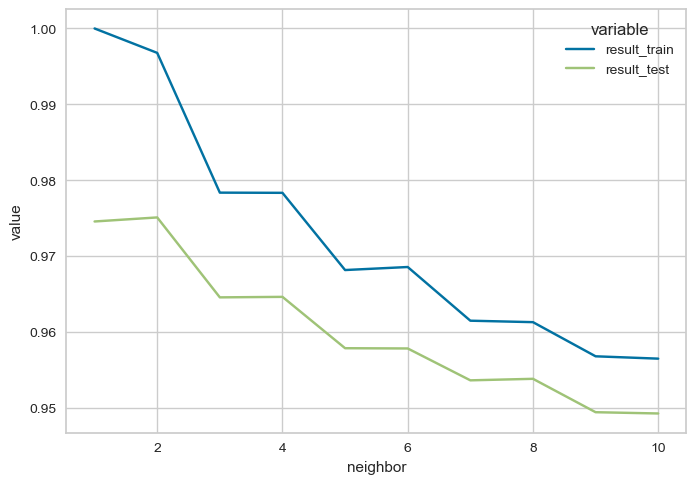

In [108]:
sns.lineplot(data = df_C , y = "value", x = "neighbor", hue = "variable")

In [110]:
[col for col in df.columns if col not in selected_features]

['sex',
 'sight_left',
 'sight_right',
 'urine_protein',
 'serum_creatinine',
 'SMK_stat_type_cd',
 'DRK_YN']

In [121]:
df_sample = df[selected_features].sample(n=50000)

X_train, X_test, y_train, y_test = train_test_split(df_sample.drop(["diabete"], axis = 1), 
                                                    df_sample["diabete"], 
                                                    test_size=0.2, random_state=42)

st_scaler = StandardScaler()
st_scaler.fit(X_train)

X_train = st_scaler.transform(X_train)
X_test = st_scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
recal_trainl = recall_score(y_train, y_train_pred, average = 'macro')
f1_train = f1_score(y_train, y_train_pred, average = 'macro')
precision_train = precision_score(y_train, y_train_pred, average = 'macro')

y_pred = knn_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred, average = 'macro')
f1_test = f1_score(y_test, y_pred, average = 'macro')
precision_test = precision_score(y_test, y_pred, average = 'macro')

print('Train')
print(f'Accuracy: {accuracy_train:.4f}')
print(f'Recall: {recal_trainl:.4f}')
print(f'F1 Score: {f1_train:.4f}')
print(f'Precision: {precision_train:.4f}')
print()
print('Test')
print(f'Accuracy: {accuracy_test:.4f}')
print(f'Recall: {recall_test:.4f}')
print(f'F1 Score: {f1_test:.4f}')
print(f'Precision: {precision_test:.4f}')

Train
Accuracy: 0.9410
Recall: 0.9409
F1 Score: 0.9406
Precision: 0.9420

Test
Accuracy: 0.9210
Recall: 0.9206
F1 Score: 0.9203
Precision: 0.9228


In [16]:
np.set_printoptions(precision=8, suppress=True)

In [17]:
unique, counts = np.unique(y_train_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0. 47027.]
 [    1. 53193.]
 [    2. 53694.]]


In [18]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0. 12713.]
 [    1. 12808.]
 [    2. 12958.]]


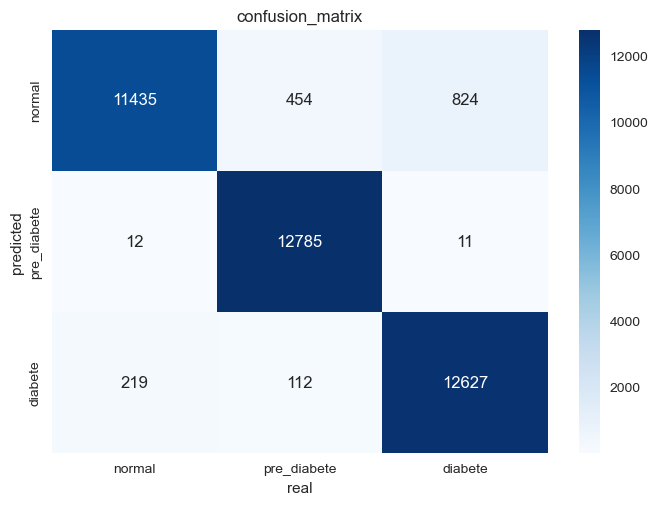

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# seaborn을 사용하여 혼동 행렬을 히트맵으로 표시
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['normal', 'pre_diabete', 'diabete'],
            yticklabels=['normal', 'pre_diabete', 'diabete'])

plt.title('confusion_matrix')
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()


# Feature importance (KNN)

In [113]:
from sklearn.inspection import permutation_importance

In [125]:
result = permutation_importance(knn_classifier, X_test, y_test, n_repeats=10, random_state=42)

for i, (importance, std) in enumerate(zip(result.importances_mean, result.importances_std)):
    print(f'Feature {df_sample.columns[i]}: {importance:.3f} +/- {std:.3f}')

Feature age: 0.104 +/- 0.003
Feature DBP: 0.116 +/- 0.002
Feature tot_chole: 0.126 +/- 0.003
Feature HDL_chole: 0.103 +/- 0.001
Feature LDL_chole: 0.124 +/- 0.003
Feature triglyceride: 0.131 +/- 0.002
Feature hemoglobin: 0.086 +/- 0.002
Feature SGOT_AST: 0.056 +/- 0.002
Feature SGOT_ALT: 0.078 +/- 0.002
Feature gamma_GTP: 0.121 +/- 0.002
Feature bmi: 0.124 +/- 0.003


In [134]:
df_result = pd.DataFrame()
df_result['feature'] = df_sample.drop('diabete', axis = 1).columns
df_result['pi_mean'] = result.importances_mean
df_result['pi_std'] = result.importances_std
df_result = df_result.sort_values(by='pi_mean', ascending = False)
df_result

,feature,pi_mean,pi_std
5,triglyceride,0.13105,0.002185
2,tot_chole,0.12571,0.003175
10,bmi,0.12427,0.002791
4,LDL_chole,0.12410,0.002549
9,gamma_GTP,0.12073,0.001821
1,DBP,0.11604,0.001829
0,age,0.10432,0.003376
3,HDL_chole,0.10304,0.001481
6,hemoglobin,0.08599,0.001953
8,SGOT_ALT,0.07834,0.002453


Text(0, 0.5, 'Features')

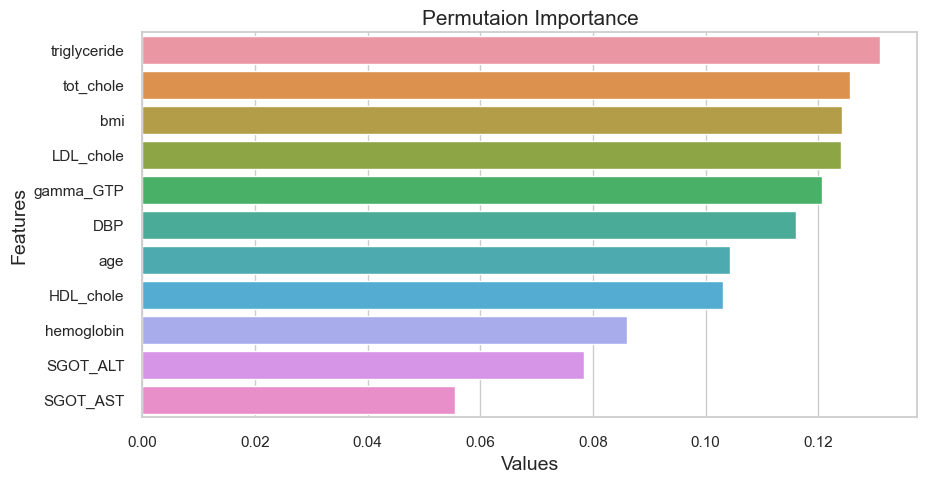

In [139]:
# 오차막대가 있는 막대그래프 그리기
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_result['pi_mean'], y=df_result['feature'], yerr=df_result['pi_std'], capsize=0.1)

# 그래프 제목 및 축 레이블 설정
ax.set_title('Permutaion Importance', fontsize=15)
ax.set_xlabel('Values', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_dropped = df.drop("diabete", axis = 1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_dropped.values, i) for i in range(df_dropped.shape[1])]
vif["features"] = df_dropped.columns
vif = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)
vif

,VIF,features
0,460.268724,tot_chole
1,156.747923,LDL_chole
2,155.589729,hemoglobin
3,86.742764,DBP
4,65.050066,bmi
5,41.825106,HDL_chole
6,39.456812,serum_creatinine
7,19.472047,sight_left
8,17.326901,sight_right
9,12.758092,triglyceride


,Description,Value
0,Session id,396
1,Target,diabete
2,Target type,Multiclass
3,Original data shape,"(30000, 17)"
4,Transformed data shape,"(30000, 17)"
5,Transformed train set shape,"(21000, 17)"
6,Transformed test set shape,"(9000, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9539,0.9937,0.9539,0.9540,0.9538,0.9308,0.9309,7.4750
knn,K Neighbors Classifier,0.9245,0.9794,0.9245,0.9274,0.9238,0.8868,0.8887,8.2670


Processing:   0%|          | 0/13 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9590,0.9956,0.9590,0.9591,0.9590,0.9386,0.9387
1,0.9538,0.9924,0.9538,0.9540,0.9539,0.9307,0.9307
2,0.9629,0.9953,0.9629,0.9628,0.9628,0.9443,0.9443
3,0.9519,0.9931,0.9519,0.9525,0.9519,0.9279,0.9281
4,0.9538,0.9934,0.9538,0.9540,0.9539,0.9307,0.9307
5,0.9538,0.9949,0.9538,0.9538,0.9537,0.9307,0.9308
6,0.9462,0.9930,0.9462,0.9463,0.9462,0.9193,0.9194
7,0.9505,0.9919,0.9505,0.9506,0.9504,0.9257,0.9258
8,0.9505,0.9925,0.9505,0.9508,0.9504,0.9257,0.9260


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

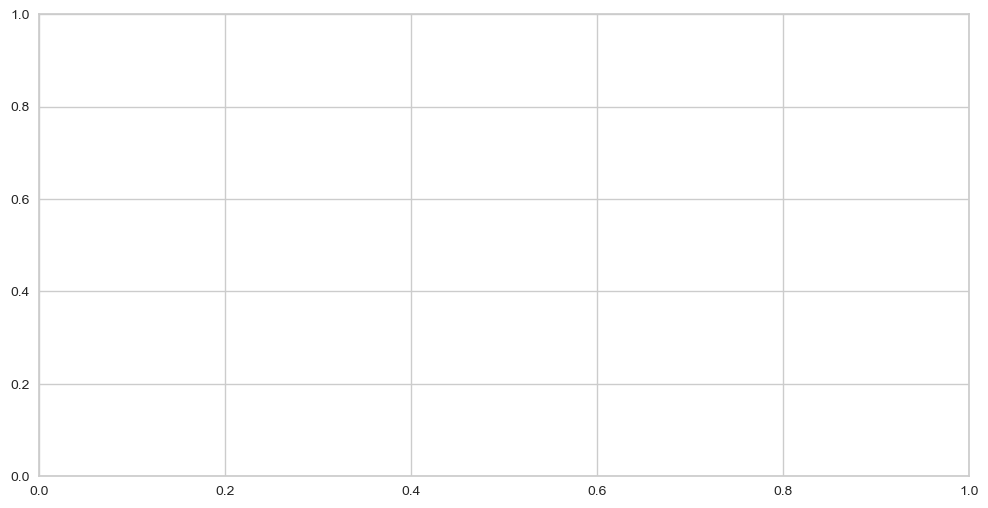

In [28]:
from pycaret.classification import *
exp_name = setup(data =  df.drop(['sight_left', 'sight_right'] , 
                                 axis = 1).sample(n=30000)
                 ,  target = 'diabete')
#compare_models(['nb', 'knn', 'svm', 'rf', 'dt'])
compare_models(['knn', 'rf'])
evaluate_model(create_model('rf'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9856,0.9982,0.9856,0.9856,0.9856,0.9784,0.9784
1,0.9857,0.9984,0.9857,0.9857,0.9857,0.9785,0.9785
2,0.9842,0.9978,0.9842,0.9842,0.9842,0.9763,0.9763
3,0.9855,0.9985,0.9855,0.9856,0.9855,0.9783,0.9783
4,0.9846,0.9985,0.9846,0.9847,0.9846,0.9769,0.9770
5,0.9862,0.9986,0.9862,0.9862,0.9862,0.9793,0.9793
6,0.9861,0.9986,0.9861,0.9861,0.9861,0.9792,0.9792
7,0.9887,0.9989,0.9887,0.9887,0.9887,0.9831,0.9831
8,0.9864,0.9986,0.9864,0.9864,0.9864,0.9796,0.9796


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

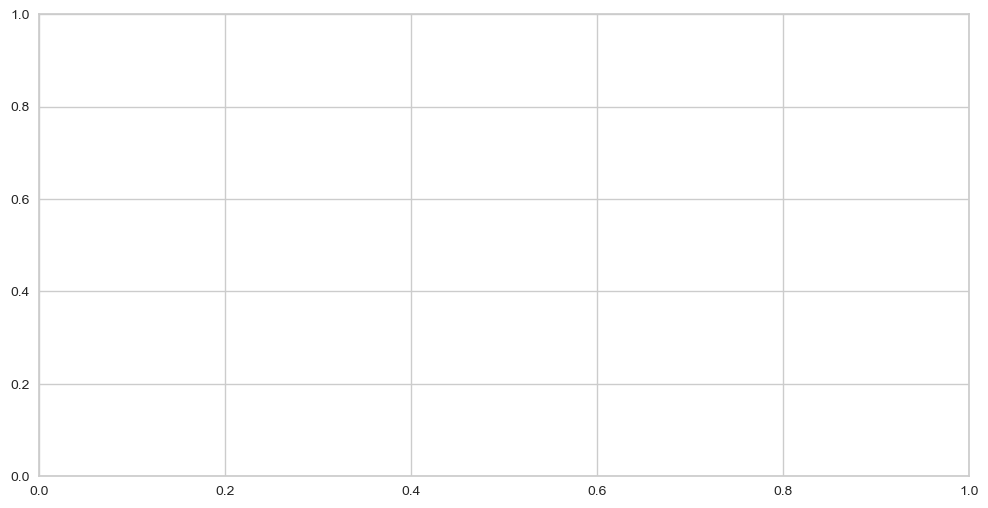

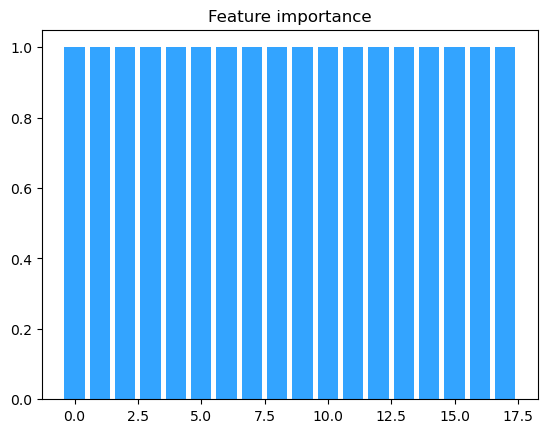

In [168]:
def get_feature_importance(X, y, n_neighbors):
    # KNN 모델을 학습합니다.
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)

    # 각 feature의 평균 거리를 계산합니다.
    distances = np.mean(knn.kneighbors_graph(X).data)

    # 각 feature의 importance score를 계산합니다.
    importance = 1.0 / distances

    return importance

def plot_feature_importance(X, y, n_neighbors):
    # feature importance score를 계산합니다.
    importance = get_feature_importance(X, y, n_neighbors)

    # feature importance plot을 생성합니다.
    plt.bar([x for x in range(X.shape[1])], importance)
    plt.title("Feature importance")
    plt.show()

plot_feature_importance(X_train, y_train, 5)


In [172]:
# KNN 모델을 학습합니다.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Permutation Importance를 사용하여 변수 중요도를 계산합니다.
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

NameError: name 'X' is not defined

In [175]:
result

{'importances_mean': array([0.04689051, 0.05728059, 0.03135736, 0.02796071, 0.06298241,
        0.05247538, 0.05343434, 0.05966891, 0.06613218, 0.03842615,
        0.03476442, 0.04380311, 0.02417163, 0.03690844, 0.07205489,
        0.06665454, 0.07193794, 0.05785234]),
 'importances_std': array([0.00092425, 0.00100876, 0.00056868, 0.00084854, 0.00166946,
        0.00102328, 0.0009309 , 0.00099056, 0.00135049, 0.0009206 ,
        0.00071115, 0.00113311, 0.00055574, 0.00055469, 0.00071816,
        0.00111397, 0.00122114, 0.00090366]),
 'importances': array([[0.04503755, 0.04810416, 0.04651888, 0.04719457, 0.04677876,
         0.04615505, 0.04844201, 0.0467008 , 0.04654487, 0.04742847],
        [0.05766782, 0.05829154, 0.05642039, 0.05782375, 0.05787572,
         0.0557187 , 0.0588113 , 0.05712207, 0.05745991, 0.05561475],
        [0.03134177, 0.03147171, 0.03162764, 0.03108189, 0.03147171,
         0.03110788, 0.03056212, 0.03128979, 0.03279711, 0.03082201],
        [0.02806726, 0.027469

In [182]:
dict(result)

{'importances_mean': array([0.04689051, 0.05728059, 0.03135736, 0.02796071, 0.06298241,
        0.05247538, 0.05343434, 0.05966891, 0.06613218, 0.03842615,
        0.03476442, 0.04380311, 0.02417163, 0.03690844, 0.07205489,
        0.06665454, 0.07193794, 0.05785234]),
 'importances_std': array([0.00092425, 0.00100876, 0.00056868, 0.00084854, 0.00166946,
        0.00102328, 0.0009309 , 0.00099056, 0.00135049, 0.0009206 ,
        0.00071115, 0.00113311, 0.00055574, 0.00055469, 0.00071816,
        0.00111397, 0.00122114, 0.00090366]),
 'importances': array([[0.04503755, 0.04810416, 0.04651888, 0.04719457, 0.04677876,
         0.04615505, 0.04844201, 0.0467008 , 0.04654487, 0.04742847],
        [0.05766782, 0.05829154, 0.05642039, 0.05782375, 0.05787572,
         0.0557187 , 0.0588113 , 0.05712207, 0.05745991, 0.05561475],
        [0.03134177, 0.03147171, 0.03162764, 0.03108189, 0.03147171,
         0.03110788, 0.03056212, 0.03128979, 0.03279711, 0.03082201],
        [0.02806726, 0.027469

In [193]:
result['importances']

array([[0.04503755, 0.04810416, 0.04651888, 0.04719457, 0.04677876,
        0.04615505, 0.04844201, 0.0467008 , 0.04654487, 0.04742847],
       [0.05766782, 0.05829154, 0.05642039, 0.05782375, 0.05787572,
        0.0557187 , 0.0588113 , 0.05712207, 0.05745991, 0.05561475],
       [0.03134177, 0.03147171, 0.03162764, 0.03108189, 0.03147171,
        0.03110788, 0.03056212, 0.03128979, 0.03279711, 0.03082201],
       [0.02806726, 0.02746953, 0.0290808 , 0.02809325, 0.02900283,
        0.02900283, 0.02624808, 0.02752151, 0.02739156, 0.02772941],
       [0.06070844, 0.06406092, 0.06369708, 0.06231971, 0.06458068,
        0.06268354, 0.06312534, 0.05982484, 0.06580213, 0.06302139],
       [0.05208036, 0.05343174, 0.05306791, 0.05273006, 0.05262611,
        0.05033915, 0.05101484, 0.05389953, 0.05262611, 0.05293797],
       [0.05475714, 0.05192443, 0.05457522, 0.05376959, 0.05350971,
        0.05324982, 0.05192443, 0.05413342, 0.05366564, 0.05283401],
       [0.05865537, 0.06021466, 0.0611762

In [174]:

# 변수 중요도를 시각화합니다.
plt.bar([x for x in range(X.shape[1])], result.importances_mean)
plt.xlabel("Feature Index")
plt.ylabel("Permutation Importance")
plt.title("Feature Importance in KNN")
plt.show()


{'importances_mean': array([0.04689051, 0.05728059, 0.03135736, 0.02796071, 0.06298241,
        0.05247538, 0.05343434, 0.05966891, 0.06613218, 0.03842615,
        0.03476442, 0.04380311, 0.02417163, 0.03690844, 0.07205489,
        0.06665454, 0.07193794, 0.05785234]),
 'importances_std': array([0.00092425, 0.00100876, 0.00056868, 0.00084854, 0.00166946,
        0.00102328, 0.0009309 , 0.00099056, 0.00135049, 0.0009206 ,
        0.00071115, 0.00113311, 0.00055574, 0.00055469, 0.00071816,
        0.00111397, 0.00122114, 0.00090366]),
 'importances': array([[0.04503755, 0.04810416, 0.04651888, 0.04719457, 0.04677876,
         0.04615505, 0.04844201, 0.0467008 , 0.04654487, 0.04742847],
        [0.05766782, 0.05829154, 0.05642039, 0.05782375, 0.05787572,
         0.0557187 , 0.0588113 , 0.05712207, 0.05745991, 0.05561475],
        [0.03134177, 0.03147171, 0.03162764, 0.03108189, 0.03147171,
         0.03110788, 0.03056212, 0.03128979, 0.03279711, 0.03082201],
        [0.02806726, 0.027469

In [173]:
X.shape[1]

NameError: name 'X' is not defined

## Scatter plot by class (by PCA)

In [140]:
df

,sex,age,sight_left,sight_right,DBP,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi,diabete
0,0.000000,2.000000,1.500000,0.900000,74.000000,200.000000,95.000000,95.000000,49.000000,14.900000,1.000000,0.500000,19.000000,13.000000,38.000000,3.000000,1.000000,20.811655,0.0
1,1.000000,0.000000,1.200000,1.200000,99.000000,192.000000,65.000000,120.000000,32.000000,15.600000,1.000000,1.100000,37.000000,35.000000,31.000000,1.000000,1.000000,26.234568,0.0
2,1.000000,2.000000,0.100000,0.300000,75.000000,157.000000,62.000000,84.000000,52.000000,15.000000,1.000000,1.000000,31.000000,57.000000,32.000000,3.000000,1.000000,23.148148,0.0
3,0.000000,3.000000,1.200000,1.500000,61.000000,145.000000,62.000000,67.000000,76.000000,12.300000,1.000000,0.500000,15.000000,11.000000,21.000000,1.000000,1.000000,20.202020,0.0
4,1.000000,3.000000,1.500000,1.500000,64.000000,207.000000,42.000000,127.000000,191.000000,16.900000,1.000000,1.100000,33.000000,59.000000,22.000000,3.000000,0.000000,26.122449,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192388,1.000000,1.704616,0.900000,0.876154,87.113847,229.658459,54.943077,135.772306,194.715383,16.487539,1.000000,0.864769,40.989233,102.704616,55.249228,1.704616,1.000000,31.311543,2.0
192389,0.071938,2.928062,0.735969,0.850356,70.431627,177.719378,66.726507,92.920933,88.359689,12.216526,1.071938,0.907194,10.791316,11.071938,54.784187,1.071938,1.000000,19.569411,2.0
192390,1.000000,3.000000,1.197635,1.197635,89.964527,189.023649,43.106419,120.881756,124.165541,16.271622,1.000000,0.898818,21.011824,26.940878,53.082770,1.023649,0.011824,31.082517,2.0
192391,0.000000,2.718566,1.274853,1.274853,75.281434,146.820237,34.065816,42.317290,349.592829,10.740128,1.000000,0.771857,10.532908,7.814342,22.940079,1.000000,0.281434,27.655634,2.0


In [141]:
df_origin = pd.read_csv("df_2030_ver_1.csv")
df_origin

,age,sight_left,sight_right,SBP,DBP,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,diabete,bmi
0,3,1.0,1.0,120.0,80.0,48.0,126.0,92.0,17.1,1,21.0,35.0,40.0,1,1,0,25.951557
1,2,0.9,1.2,130.0,82.0,55.0,148.0,121.0,15.8,1,20.0,36.0,27.0,3,0,1,24.691358
2,3,1.2,1.0,132.0,80.0,58.0,107.0,101.0,14.4,1,18.0,18.0,35.0,3,1,0,21.224490
3,2,1.2,1.2,118.0,72.0,55.0,129.0,77.0,15.7,1,13.0,16.0,19.0,1,1,0,24.489796
4,2,0.9,1.0,129.0,77.0,53.0,108.0,219.0,14.5,1,21.0,24.0,58.0,1,0,0,19.531250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248662,3,0.7,0.9,110.0,80.0,57.0,140.0,59.0,12.9,1,25.0,12.0,13.0,1,1,0,27.055151
248663,3,1.0,1.0,113.0,69.0,63.0,92.0,88.0,13.3,1,20.0,17.0,12.0,1,0,0,25.711662
248664,0,1.0,1.5,105.0,70.0,72.0,120.0,92.0,15.4,1,25.0,26.0,50.0,2,1,0,21.224490
248665,3,1.0,1.5,119.0,83.0,40.0,84.0,45.0,15.8,1,14.0,17.0,15.0,1,0,0,25.951557


In [5]:
df.columns

Index(['sex', 'age', 'sight_left', 'sight_right', 'DBP', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'SMK_stat_type_cd', 'DRK_YN', 'bmi', 'diabete'],
      dtype='object')

<AxesSubplot:xlabel='hemoglobin', ylabel='triglyceride'>

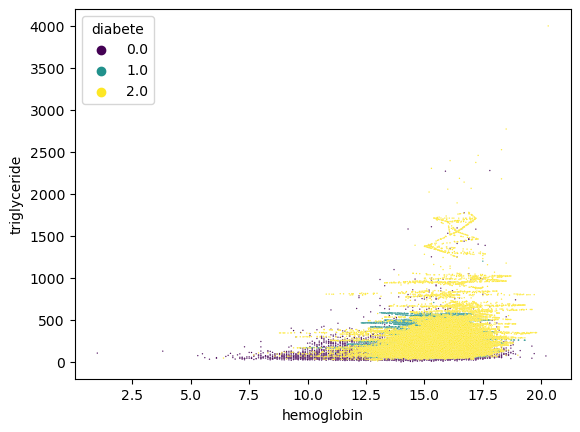

In [8]:
sns.scatterplot(x='hemoglobin', y='triglyceride', hue='diabete', data=df, palette='viridis', s = 1)

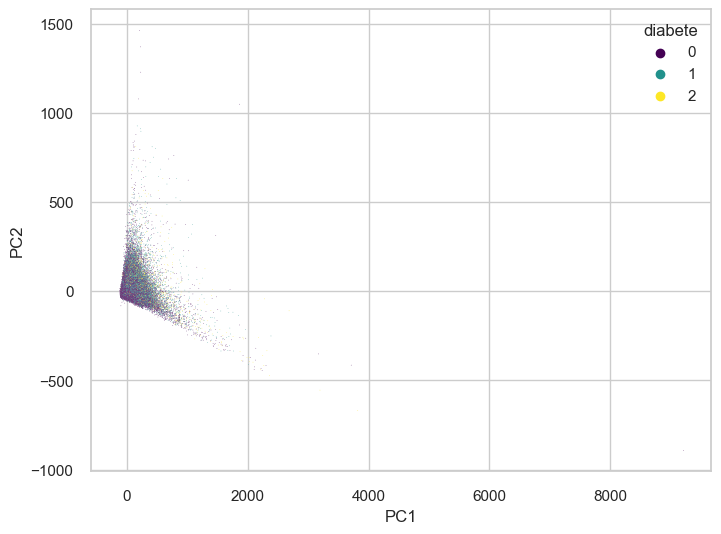

In [147]:
# PCA를 통해 데이터셋을 2차원으로 줄입니다.
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_origin.drop('diabete', axis=1))

# PCA 결과를 DataFrame으로 변환하고 클래스 정보를 추가합니다.
data_pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
data_pca_df['diabete'] = df_origin['diabete']

# seaborn을 이용해 산포도를 그립니다.
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='diabete', data=data_pca_df, palette='viridis', s= 0.2)
plt.show()

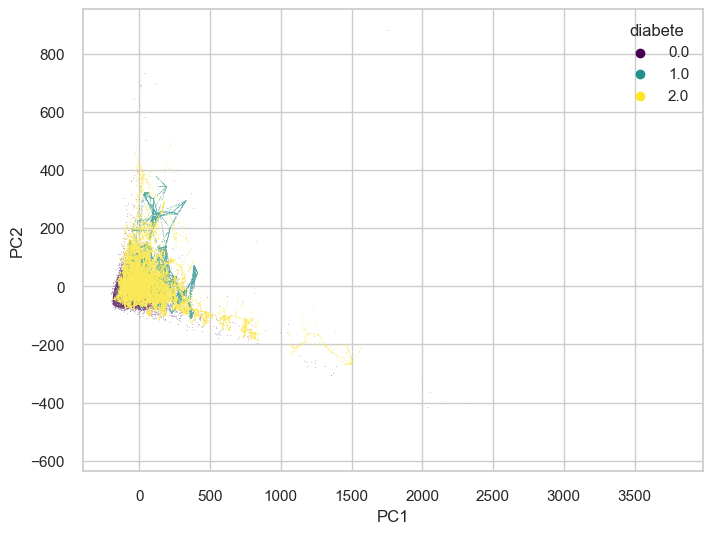

In [146]:
# PCA를 통해 데이터셋을 2차원으로 줄입니다.
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df.drop('diabete', axis=1))

# PCA 결과를 DataFrame으로 변환하고 클래스 정보를 추가합니다.
data_pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
data_pca_df['diabete'] = df['diabete']

# seaborn을 이용해 산포도를 그립니다.
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='diabete', data=data_pca_df, palette='viridis', s= 0.2)
plt.show()

In [148]:
from mpl_toolkits.mplot3d import Axes3D

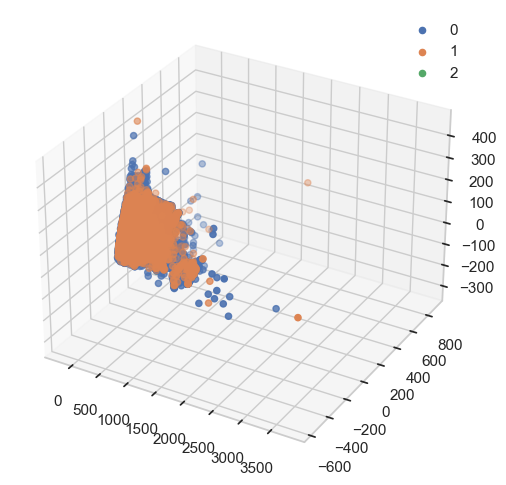

In [154]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(df.drop('diabete', axis=1))

# PCA 결과를 DataFrame으로 변환하고 클래스 정보를 추가합니다.
data_pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PC3'])
data_pca_df['diabete'] = df_origin['diabete']

# 3차원 그래프를 그리기 위한 figure와 axes를 생성합니다.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 각 클래스에 대해 산점도를 그립니다.
for class_type in data_pca_df['diabete'].unique():
    im = ax.scatter(data_pca_df[data_pca_df['diabete'] == class_type]['PC1'], 
                    data_pca_df[data_pca_df['diabete'] == class_type]['PC2'], 
                    data_pca_df[data_pca_df['diabete'] == class_type]['PC3'], 
                    label=class_type)

# 범례를 추가합니다.
ax.legend()

# 그래프를 출력합니다.
plt.show()

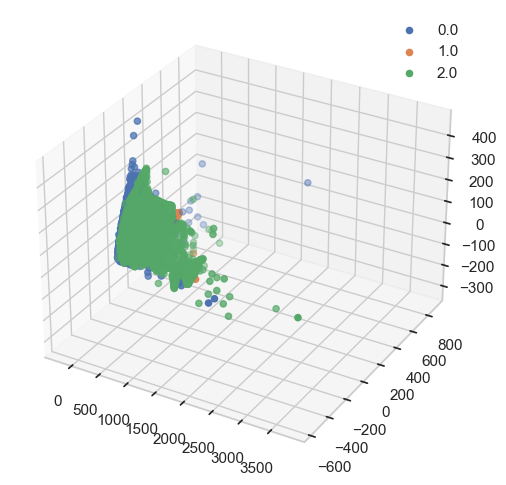

In [153]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(df.drop('diabete', axis=1))

# PCA 결과를 DataFrame으로 변환하고 클래스 정보를 추가합니다.
data_pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PC3'])
data_pca_df['diabete'] = df['diabete']

# 3차원 그래프를 그리기 위한 figure와 axes를 생성합니다.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 각 클래스에 대해 산점도를 그립니다.
for class_type in data_pca_df['diabete'].unique():
    im = ax.scatter(data_pca_df[data_pca_df['diabete'] == class_type]['PC1'], 
                    data_pca_df[data_pca_df['diabete'] == class_type]['PC2'], 
                    data_pca_df[data_pca_df['diabete'] == class_type]['PC3'], 
                    label=class_type)

# 범례를 추가합니다.
ax.legend()

# 그래프를 출력합니다.
plt.show()